In [10]:
import numpy as np
import matplotlib.pyplot as plt
from models import topaz

In [27]:
##variable name dictionary, TOPAZ4 convention
topaz.var_dict

{'ocean_velocity': {'name': ('u', 'v'), 'nz': 50, 'units': 'm/s'},
 'ocean_layer_depth': {'name': 'dp', 'nz': 50, 'units': 'm'},
 'ocean_temp': {'name': 'temp', 'nz': 50, 'units': 'K'},
 'ocean_salinity': {'name': 'saln', 'nz': 50, 'units': 'psu'},
 'ocean_surf_height': {'name': 'ssh', 'nz': 0, 'units': 'm'}}

In [21]:
##directory storing TP4 restart files
path = '/cluster/work/users/yingyue/data/TP4'

##reads topo/grid.info file and create Grid obj
grid = topaz.get_grid(path)

##land mask from the topo/depth.a file
mask = topaz.get_mask(path, grid)

##read ocean current and surface height fields from TP4restart
current = topaz.get_var(path, grid, name='ocean_velocity', mask=mask)
ssh  = topaz.get_var(path, grid, name='ocean_surf_height', mask=mask)

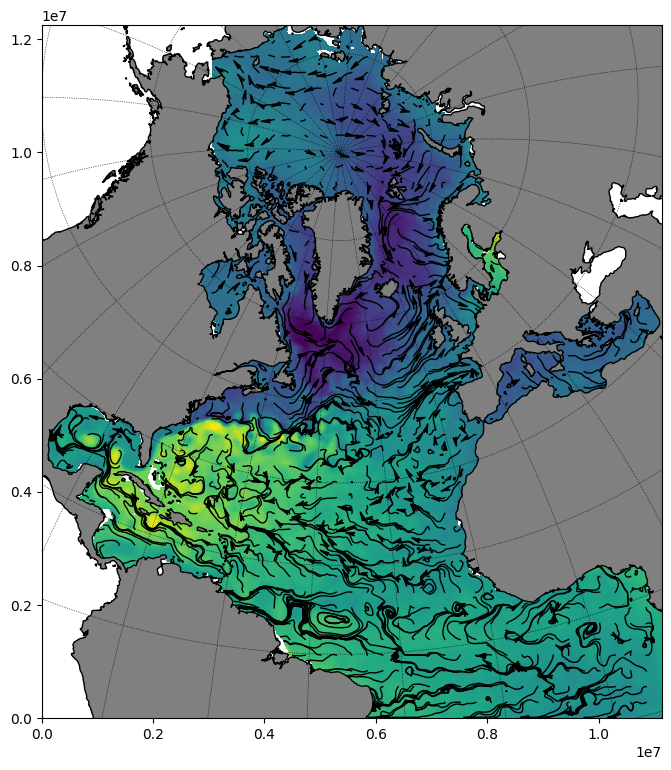

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(8,9))

grid.plot_field(ax, ssh)
grid.plot_vectors(ax, current, V=0.1, num_steps=50)
grid.plot_land(ax, color='gray', dlat=15, dlon=15)

In [22]:
##make another smaller grid for the arctic region
import pyproj
from grid import Grid
grid1 = Grid.regular_grid(pyproj.Proj('+proj=stere +lon_0=0 +lat_0=90'), -3.5e6, 2.5e6, -3.5e6, 2.5e6, dx=1e4)

In [23]:
##convert from grid to grid1
grid.dst_grid = grid1
current_ = grid.convert(current, is_vector=True)
ssh_ = grid.convert(ssh)

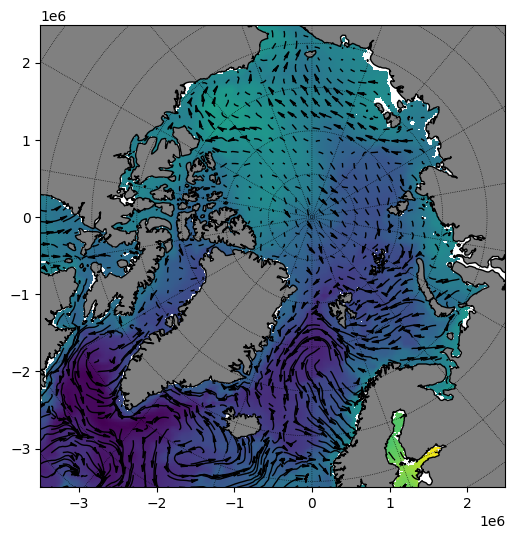

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
grid1.plot_field(ax, ssh_)
grid1.plot_vectors(ax, current_)
grid1.plot_land(ax, color='gray')